# Part 3. Compare simulations

In [1]:
from pathlib import Path

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rc("figure", dpi=80)

In [3]:
def get_values(sim):
    N = sim.params.N
    Uc = sim.params.forcing.milestone.movement.periodic_uniform.speed
    Dc = sim.params.forcing.milestone.objects.diameter
    Lf = sim.params.forcing.milestone.movement.periodic_uniform.length

    Fhc = Uc / (N * Dc)
    Rec = Uc * Dc / sim.params.nu_2

    period = sim.forcing.get_info()["period"]
    t_statio = period
    averages = sim.output.spatial_means.get_dimless_numbers_averaged(
        tmin=t_statio
    )

    U2 = averages["dimensional"]["Uh2"]
    epsK = averages["dimensional"]["epsK"]
    Gamma = averages["Gamma"]
    Fh = averages["Fh"]
    R2 = averages["R2"]
    R4 = averages["R4"]

    return N, Uc, Dc, Lf, Fhc, Rec, U2, epsK, Gamma, Fh, R2, R4

In [4]:
import fluidsim as fls

path_dir_data = Path(fls.FLUIDSIM_PATH) / "tutorial_parametric_study"
path_runs = sorted(path_dir_data.glob("*"), key=lambda p: p.name)
[p.name for p in path_runs]

['ns3d.strat_144x144x48_V4.5x4.5x1.5_N0.2_Lf3.5_U0.01_D0.5_2021-10-05_15-35-47',
 'ns3d.strat_144x144x48_V4.5x4.5x1.5_N0.2_Lf3.5_U0.02_D0.5_2021-10-05_16-12-36',
 'ns3d.strat_144x144x48_V4.5x4.5x1.5_N0.2_Lf3.5_U0.04_D0.5_2021-10-05_16-49-31',
 'ns3d.strat_144x144x48_V4.5x4.5x1.5_N0.2_Lf3.5_U0.06_D0.5_2021-10-05_17-25-48',
 'ns3d.strat_144x144x48_V4.5x4.5x1.5_N0.2_Lf3.5_U0.08_D0.5_2021-10-05_18-01-23']

## Compare simulations with Pandas

In [5]:
import numpy as np
from pandas import DataFrame

# fmt: off
columns = ["N", "Uc", "Dc", "Lf", "Fhc", "Rec", "U2", "epsK", "Gamma", "Fh", "R2", "R4"]
# fmt: on

values = []
for path in path_runs:
    sim = fls.load(path, hide_stdout=True)
    values.append(get_values(sim))

df = DataFrame(values, columns=columns)
df["min_R"] = np.array([df.R2, df.R4]).min(axis=0)
df

,N,Uc,Dc,Lf,Fhc,Rec,U2,epsK,Gamma,Fh,R2,R4,min_R
0,0.2,0.01,0.5,3.5,0.1,5000.0,0.000030,5.564985e-08,0.300576,0.009451,1.391246,0.170957,0.170957
1,0.2,0.02,0.5,3.5,0.2,10000.0,0.000109,3.917927e-07,0.468731,0.018019,9.794817,2.204561,2.204561
2,0.2,0.04,0.5,3.5,0.4,20000.0,0.000419,2.834370e-06,0.618684,0.034420,70.859251,30.298269,30.298269
3,0.2,0.06,0.5,3.5,0.6,30000.0,0.000914,8.980284e-06,0.629455,0.049961,224.507095,139.360780,139.360780
4,0.2,0.08,0.5,3.5,0.8,40000.0,0.001652,2.199885e-05,0.561550,0.067149,549.971217,463.932956,463.932956


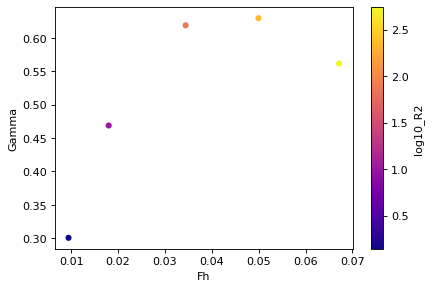

In [6]:
df["log10_R2"] = np.log10(df.R2)
fig, ax = plt.subplots()
df.plot.scatter(ax=ax, x="Fh", y="Gamma", c="log10_R2", cmap="plasma");

## A figure with data from different simulations

compute mean of spectra
tmin =  800.502 ; tmax =  1600.67
imin =      100 ; imax =      200
compute mean of spectra
tmin =  400.051 ; tmax =  800.132
imin =      100 ; imax =      200
compute mean of spectra
tmin =  200.093 ; tmax =  400.025
imin =      100 ; imax =      200
compute mean of spectra
tmin =  133.342 ; tmax =  266.703
imin =      101 ; imax =      201
compute mean of spectra
tmin =  100.004 ; tmax =  200.024
imin =      100 ; imax =      200


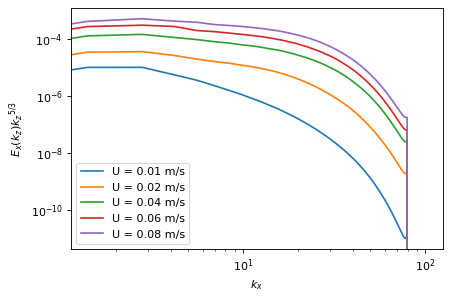

In [7]:
fig, ax = plt.subplots()

for path in path_runs:
    sim = fls.load(path, hide_stdout=True)
    period = sim.forcing.get_info()["period"]
    data = sim.output.spectra.load1d_mean(tmin=period)
    spectrum = data["spectra_vx_kx"]
    kx = data["kx"]
    ax.loglog(
        kx,
        spectrum * kx ** (5 / 3),
        label=f"U = {sim.params.forcing.milestone.movement.periodic_uniform.speed} m/s",
    )

ax.set_xlabel("$k_x$")
ax.set_ylabel("$E_x(k_z) {k_z}^{5/3}$")
plt.legend();